In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib.patches as patches
import cv2
import shutil

In [ ]:
#Needed for correct pathing with different operating systems
from pathlib import Path

In [ ]:
#Setting up paths to images & labels of data
data = pd.read_csv('train_labels.csv')
train_path = Path('train/')
test_path = Path('test/')

data_train_pos_path = Path('data/train/positive/')
data_train_neg_path =Path('data/train/negative/')

data_val_pos_path = Path('data/val/positive/')
data_val_neg_path = Path('data/val/negative/')

#Testing doesnt need a split
data_test_path = Path('data/test/')

#Store discarded images to view
data_discard_path = Path('discard/')



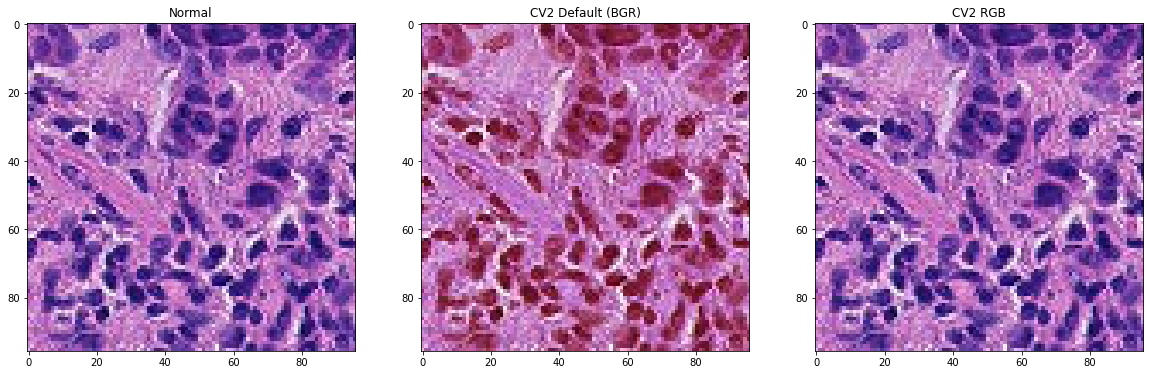

In [ ]:
#Showing the visualizations of an image.

fig, ax = plt.subplots(1,3, figsize=(20,8))
img=plt.imread('train/0000da768d06b879e5754c43e2298ce48726f722.tif')

#Regular image using matplotlib.pyplot
ax[0].set_title('Normal')
ax[0].imshow(img)


#CV2 processes the image as a BGR image, so the colors are 'incorrect'.
img2 = cv2.imread('train/0000da768d06b879e5754c43e2298ce48726f722.tif')
ax[1].set_title('CV2 Default (BGR)')
ax[1].imshow(img2)

#To fix, we can just split and reorder the image to standard RGB.
b,g,r = cv2.split(img2)
rgb_img2 = cv2.merge([r,g,b])
ax[2].set_title('CV2 RGB')
ax[2].imshow(rgb_img2)

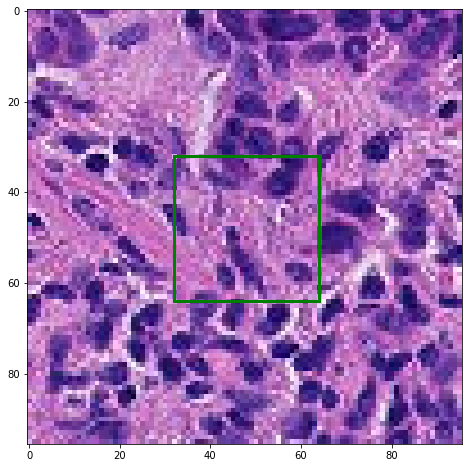

In [ ]:
#In this challenge, we are tasked to examine the 32x32 px center of the full 96x96 px image.
fig, ax = plt.subplots(figsize = (20,8))
ax.imshow(img)
focus = patches.Rectangle((32,32),32,32, linewidth = 3, edgecolor = 'g',facecolor='none')
ax.add_patch(focus)

# Preprocessing

For now, we will just preprocess the training data by cropping the image for the 32x32 center. Of course, this means we are cutting out potential information, but we can go back to this later. We can also prevent overfitting the model by performing random minor augmentations/perturbations to the image for the model to train on.

## Image Cropping

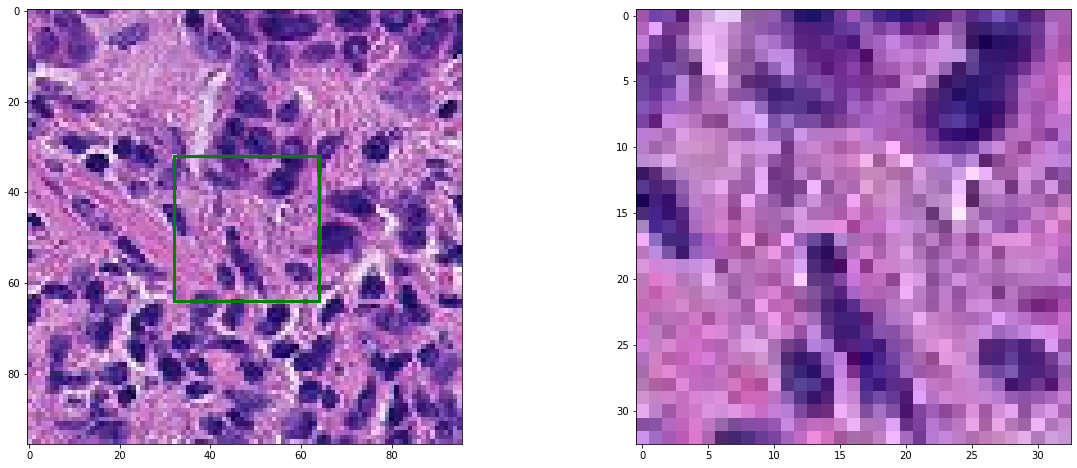

In [ ]:
#Image Cropping Method

fig, ax = plt.subplots(1,2,figsize = (20,8))
img=plt.imread('train/0000da768d06b879e5754c43e2298ce48726f722.tif')
ax[0].imshow(img)
focus = patches.Rectangle((32,32),32,32, linewidth = 3, edgecolor = 'g',facecolor='none')
ax[0].add_patch(focus)

img_cropped = img[31:64,31:64].copy()
ax[1].imshow(img_cropped)

## Brightness deletion

In [ ]:
#Brightness detection graph

#What are the brightness values
bright_vals = []


for ind in data.index:
    img_id = str(data['id'][ind]) + '.tif'
    img_path = train_path / img_id
    img=cv2.imread(str(img_path))
    val = np.mean(img)
    bright_vals.append(val)

### Visualize distribution

Text(0.5, 0, 'pixel')

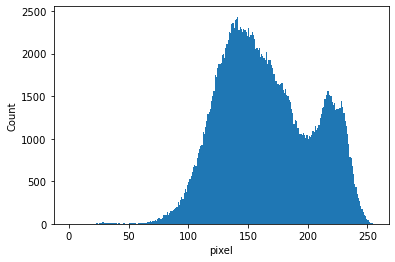

In [ ]:
plt.hist(bright_vals, density=False, bins=255)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('pixel')

### Create a dataframe for images that are too bright or dark

In [ ]:
toInclude =  [True for i in range(len(bright_vals))] 

Brightness_Df = pd.DataFrame(data={'Brightness value': bright_vals, 'id':data['id'],'Inclusion': toInclude})

#We use the cutoff >240 means image is too bright, <55 means too dark
Brightness_Df.loc[Brightness_Df['Brightness value'] > 240, 'Inclusion'] = False
Brightness_Df.loc[Brightness_Df['Brightness value'] < 55, 'Inclusion'] = False

discarded_images = Brightness_Df[Brightness_Df['Inclusion'] == False].copy()


display(discarded_images)

,Brightness value,id,Inclusion
123,246.394025,3fba28085a19efba117972e08f12c51313d589ff,False
285,245.514865,cf8f42da3b98b8bcf8182a596e9479b8e5bf6ee1,False
324,244.809751,1c8e2bbe144d16fa0fc0dd662f307e7ea93018af,False
407,241.331814,415bd3f8d38847115e1abecde453636c0ed24b7c,False
436,252.235460,9071b424ec2e84deeb59b54d2450a6d0172cf701,False
...,...,...,...
219480,242.681026,b18c7763825a92f02bf1269cf4e8d1bb7bbbc983,False
219569,245.631330,6560564ab368b7217f218a8c49e25f805dfa2847,False
219596,247.311523,ee681b36aa197404d65c2b52d41889368001dff8,False
219630,241.094871,f4ddda1a45d03ceea7c6729502f15d92221fc1ac,False


### Save images we are discarding (they are cropped)

In [ ]:
#CREATE DIRECTORY DISCARD
for ind in discarded_images.index:
    img_id = str(discarded_images['id'][ind]) + '.tif'
    img_path = train_path / img_id
    

    new_img_path = data_discard_path / img_id
    
    img=cv2.imread(str(img_path))
    img_cropped = img[31:64,31:64].copy()
    cv2.imwrite(str(new_img_path), img_cropped)

### Experimenting stuff (can be ignored)

In [ ]:
# print(len(bright_vals))
# #print(min(bright_vals),max(bright_vals))
# #print(bright_vals.index(0))
# print(data.index[0])


# bright_sorted = sorted(bright_vals)

# print(bright_sorted[240])

# #high = 240
# #low = 55

# #display(data_val)
# fig, ax = plt.subplots(1,1, figsize=(20,8))
# img_id = str(data['id'][bright_vals.index(bright_sorted[240])]) + '.tif'
# img_path = train_path / img_id
# img=cv2.imread(str(img_path))
# #img=cv2.imread('train/f6f1d771d14f7129a6c3ac2c220d90992c30c10b.tif')
# print(np.mean(img))
# b,g,r = cv2.split(img)
# img = cv2.merge([r,g,b])
# print(np.mean(img))
# ax.set_title('Dark')
# ax.imshow(img)

In [ ]:
#Split and shuffle data
num_data = len(data)
#Shuffle Data
data2 = data.sample(frac = 1).reset_index(drop=True)
#Split data into training and validation sets
num_val_data = num_data//10
data_val = data2.iloc[:num_val_data,:]
data_train = data2.iloc[num_val_data:,:].reset_index(drop=True)


In [ ]:
#Preprocess and save images in validation set
for ind in data_val.index:
    img_id = str(data_val['id'][ind]) + '.tif'
    img_path = train_path / img_id
    
    #print(img_path)
    if (data_val['label'][ind] == 0):
        new_img_path = data_val_neg_path / img_id
    else:
        new_img_path = data_val_pos_path / img_id
    
    img=cv2.imread(str(img_path))
    
    #If too bright or dark, dont save
    val = np.mean(img)
    if ((val > 240) or (val < 55)):
        continue
    
    img_cropped = img[31:64,31:64].copy()
    cv2.imwrite(str(new_img_path), img_cropped)

In [ ]:
for ind in data_train.index:
    img_id = str(data_train['id'][ind]) + '.tif'
    img_path = train_path / img_id
    
    #print(img_path)
    if (data_train['label'][ind] == 0):
        new_img_path = data_train_neg_path / img_id
    else:
        new_img_path = data_train_pos_path / img_id
    
    img=cv2.imread(str(img_path))
    
    #If too bright or dark, dont save
    val = np.mean(img)
    if ((val > 240) or (val < 55)):
        continue
    
    img_cropped = img[31:64,31:64].copy()
    cv2.imwrite(str(new_img_path), img_cropped)

In [ ]:
#To Clear all data from preprocessed folders, run this block.
# shutil.rmtree(data_val_neg_path)
# os.makedirs(data_val_neg_path)

# shutil.rmtree(data_val_pos_path)
# os.makedirs(data_val_pos_path)


# shutil.rmtree(data_train_neg_path)
# os.makedirs(data_train_neg_path)

# shutil.rmtree(data_train_pos_path)
# os.makedirs(data_train_pos_path)

## Elimination

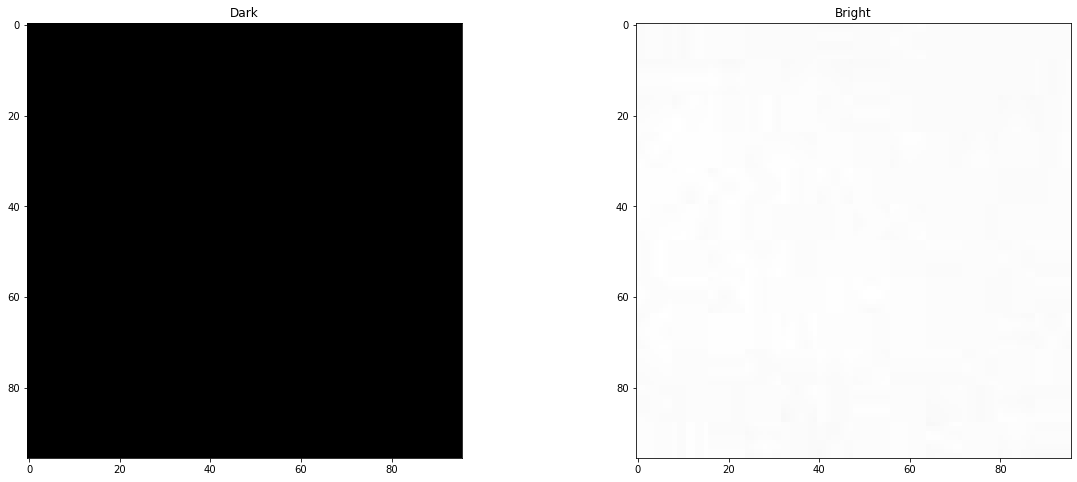

In [ ]:
#Get rid of very dark and very bright images like the ones seen below.

fig, ax = plt.subplots(1,2, figsize=(20,8))
preimg = cv2.imread('train/9369c7278ec8bcc6c880d99194de09fc2bd4efbe.tif')
b,g,r = cv2.split(preimg)
img = cv2.merge([r,g,b])
ax[0].set_title('Dark')
ax[0].imshow(img)

preimg2 = cv2.imread('train/f6f1d771d14f7129a6c3ac2c220d90992c30c10b.tif')
b,g,r = cv2.split(preimg2)
img2 = cv2.merge([r,g,b])
ax[1].set_title('Bright')
ax[1].imshow(img2)


In [ ]:
#Method....... WIP